# Data Mining Lab 1 - HW

## Student Information
Name: Keith Saudjana  
Student ID: 113062421  
GitHub ID:

## Library Installation and Importing

In [1]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib==3.7.3
!pip install plotly
!pip install seaborn
!pip install nltk
!pip install pami
!pip install umap
!pip install umap-learn
!pip install requests
!pip install wordcloud
!pip install fsspec
!pip install huggingface_hub

In [2]:
import pandas as pd
import numpy as np
import umap
import PAMI
import seaborn as sns
import plotly as pt
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import helpers.data_mining_helpers as dmh

In [4]:
%load_ext autoreload
%autoreload 2

## HW Part 2

### Data Initialization

In [16]:
## Load Dataset
main_df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

main_df.head()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [17]:
main_df.shape

(1500, 2)

In [18]:
## Detect dataset categories
categories = main_df['sentiment'].unique()

categories

array(['not nostalgia', 'nostalgia'], dtype=object)

In [19]:
# Category mapping
main_df['category'] = main_df['sentiment'].apply(lambda x: 0 if x == 'not nostalgia' else 1)

main_df.head()

,sentiment,comment,category
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1


### Data Cleaning

In [20]:
# Drop null data
main_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [61]:
for category_name in term_document_dfs:
  # Replace '.' to '_' for file creation
  category_safe = category_name.replace('.', '_')
  # Convert term document to transactional database
  obj = db.denseDF2DB(term_document_dfs[category_name])
  obj.convert2TransactionalDatabase(rf'C:\Users\USER\Desktop\University\1-1\DM\DM2024_Lab1_HW\td_freq_db_{category_safe}.csv', '>=', 1)

#### Nostalgia Data

Database size (total no of transactions) : 694
Number of items : 2031
Minimum Transaction Size : 1
Average Transaction Size : 6.340057636887608
Maximum Transaction Size : 33
Standard Deviation Transaction Size : 5.703751027980201
Variance in Transaction Sizes : 32.57972063159383
Sparsity : 0.996878356653428


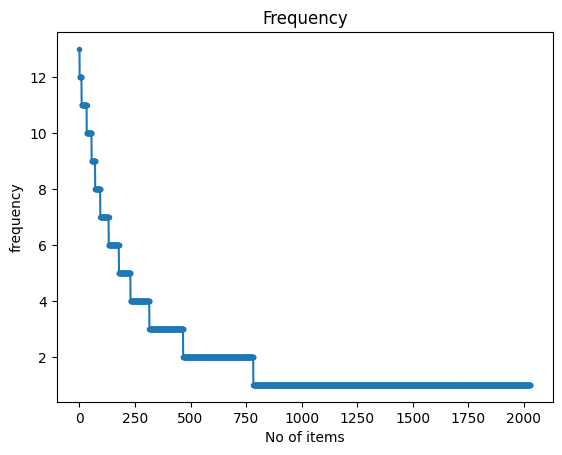

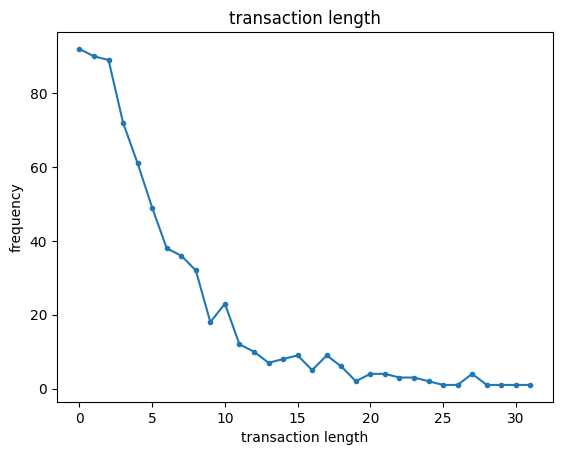

In [63]:
# Transactional database visualization
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(r'C:\Users\USER\Desktop\University\1-1\DM\DM2024_Lab1_HW\td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [64]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# FPGrowth parameter setting
minSup=9

# FPGrowth application
obj1 = alg.FPGrowth(iFile=r'C:\Users\USER\Desktop\University\1-1\DM\DM2024_Lab1_HW\td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()

frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia)))
print('Runtime: ' + str(obj1.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 71
Runtime: 0.005002260208129883


In [65]:
# Save mining result
obj1.save('freq_patterns_nostalgia_minSup9.txt')
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
66,youth,12
67,dancing,12
68,80s,12
69,their,12


#### Not Nostalgia Data

Database size (total no of transactions) : 694
Number of items : 2031
Minimum Transaction Size : 1
Average Transaction Size : 6.340057636887608
Maximum Transaction Size : 33
Standard Deviation Transaction Size : 5.703751027980201
Variance in Transaction Sizes : 32.57972063159383
Sparsity : 0.996878356653428


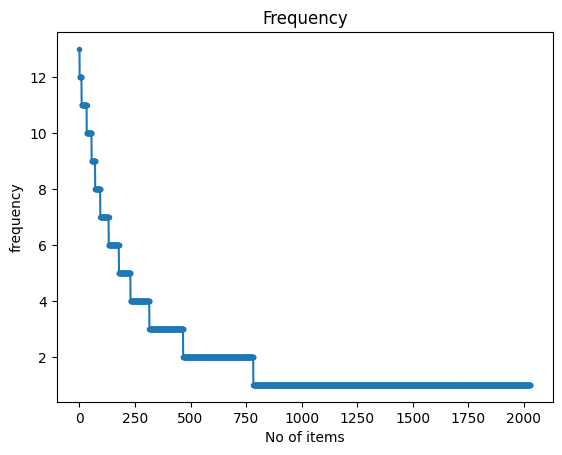

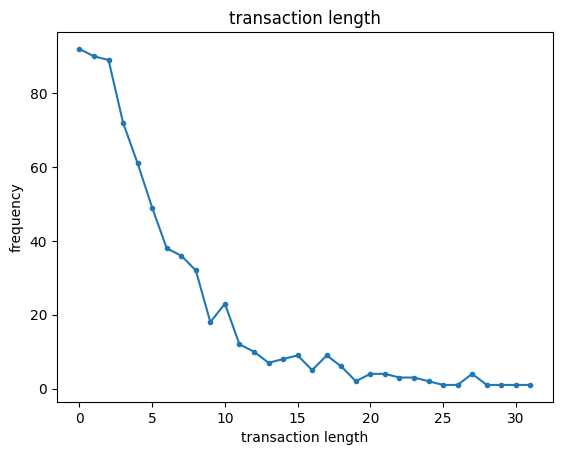

In [66]:
# Transactional database visualization
obj = tds.TransactionalDatabase(r'C:\Users\USER\Desktop\University\1-1\DM\DM2024_Lab1_HW\td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### FPGrowth Application

In [68]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# FPGrowth parameter setting
minSup=9

# FPGrowth Application
obj2 = alg.FPGrowth(iFile=r'C:\Users\USER\Desktop\University\1-1\DM\DM2024_Lab1_HW\td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()

frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia)))
print('Runtime: ' + str(obj2.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 23
Runtime: 0.01701498031616211


In [69]:
# Save mining result
obj2.save('freq_patterns_not_nostalgia_minSup9.txt')
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
5,60s,9
6,ones,9
7,pure,9
8,please,9
9,though,9


### Unique Pattern Recognition

In [70]:
# Group dataframes
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia,]

# Patter identification
pattern_counts = {}
for df in dfs:
  for pattern in df['Patterns']:
    if pattern not in pattern_counts:
      pattern_counts[pattern] = 1
    else:
      pattern_counts[pattern] += 1

# Filter out patterns that are not unique to a dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(df) for df in dfs)
# Calculate discarded patterns
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# Filter out patterns that are not unique within their dataframe
filtered_dfs = []
for df in dfs:
  filtered_df = df[df['Patterns'].isin(unique_patterns)]
  filtered_dfs.append(filtered_df)

# Merge filtered dataframes
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(final_pattern_df)

print(f"Number of patterns discarded: {discarded_patterns_count}")


     Patterns  Support
68        rip       13
60       grew       12
67      their       12
66        80s       12
65    dancing       12
..        ...      ...
5      player        9
4        sure        9
3         its        9
69  favorites        9
0        find        9

[90 rows x 2 columns]
Number of patterns discarded: 4


In [73]:
from sklearn.feature_extraction.text import CountVectorizer

# Generate term document
count_vect = CountVectorizer()
main_tdm = count_vect.fit_transform(main_df['comment'])
terms = count_vect.get_feature_names_out()

# Tokenize sentences
main_df['tokenized_comment'] = main_df['comment'].str.split().apply(set)

# Initialize pattern amtrix
pattern_matrix = pd.DataFrame(0, index=main_df.index, columns=final_pattern_df['Patterns'])

# Verify word patterns in each tokenized sentence
for pattern in final_pattern_df['Patterns']:
  pattern_words = set(pattern.split())
  pattern_matrix[pattern] = main_df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert term document to matrix
tdm_df = pd.DataFrame(main_tdm.toarray(), columns=terms, index=main_df.index)

# Group term document with pattern matrix
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,yes,tv,special,together,left,player,sure,its,favorites,find
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dimensionality Reduction

In [71]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

In [ ]:
# Apply PCA, TSNE, and UMAP to term document
pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

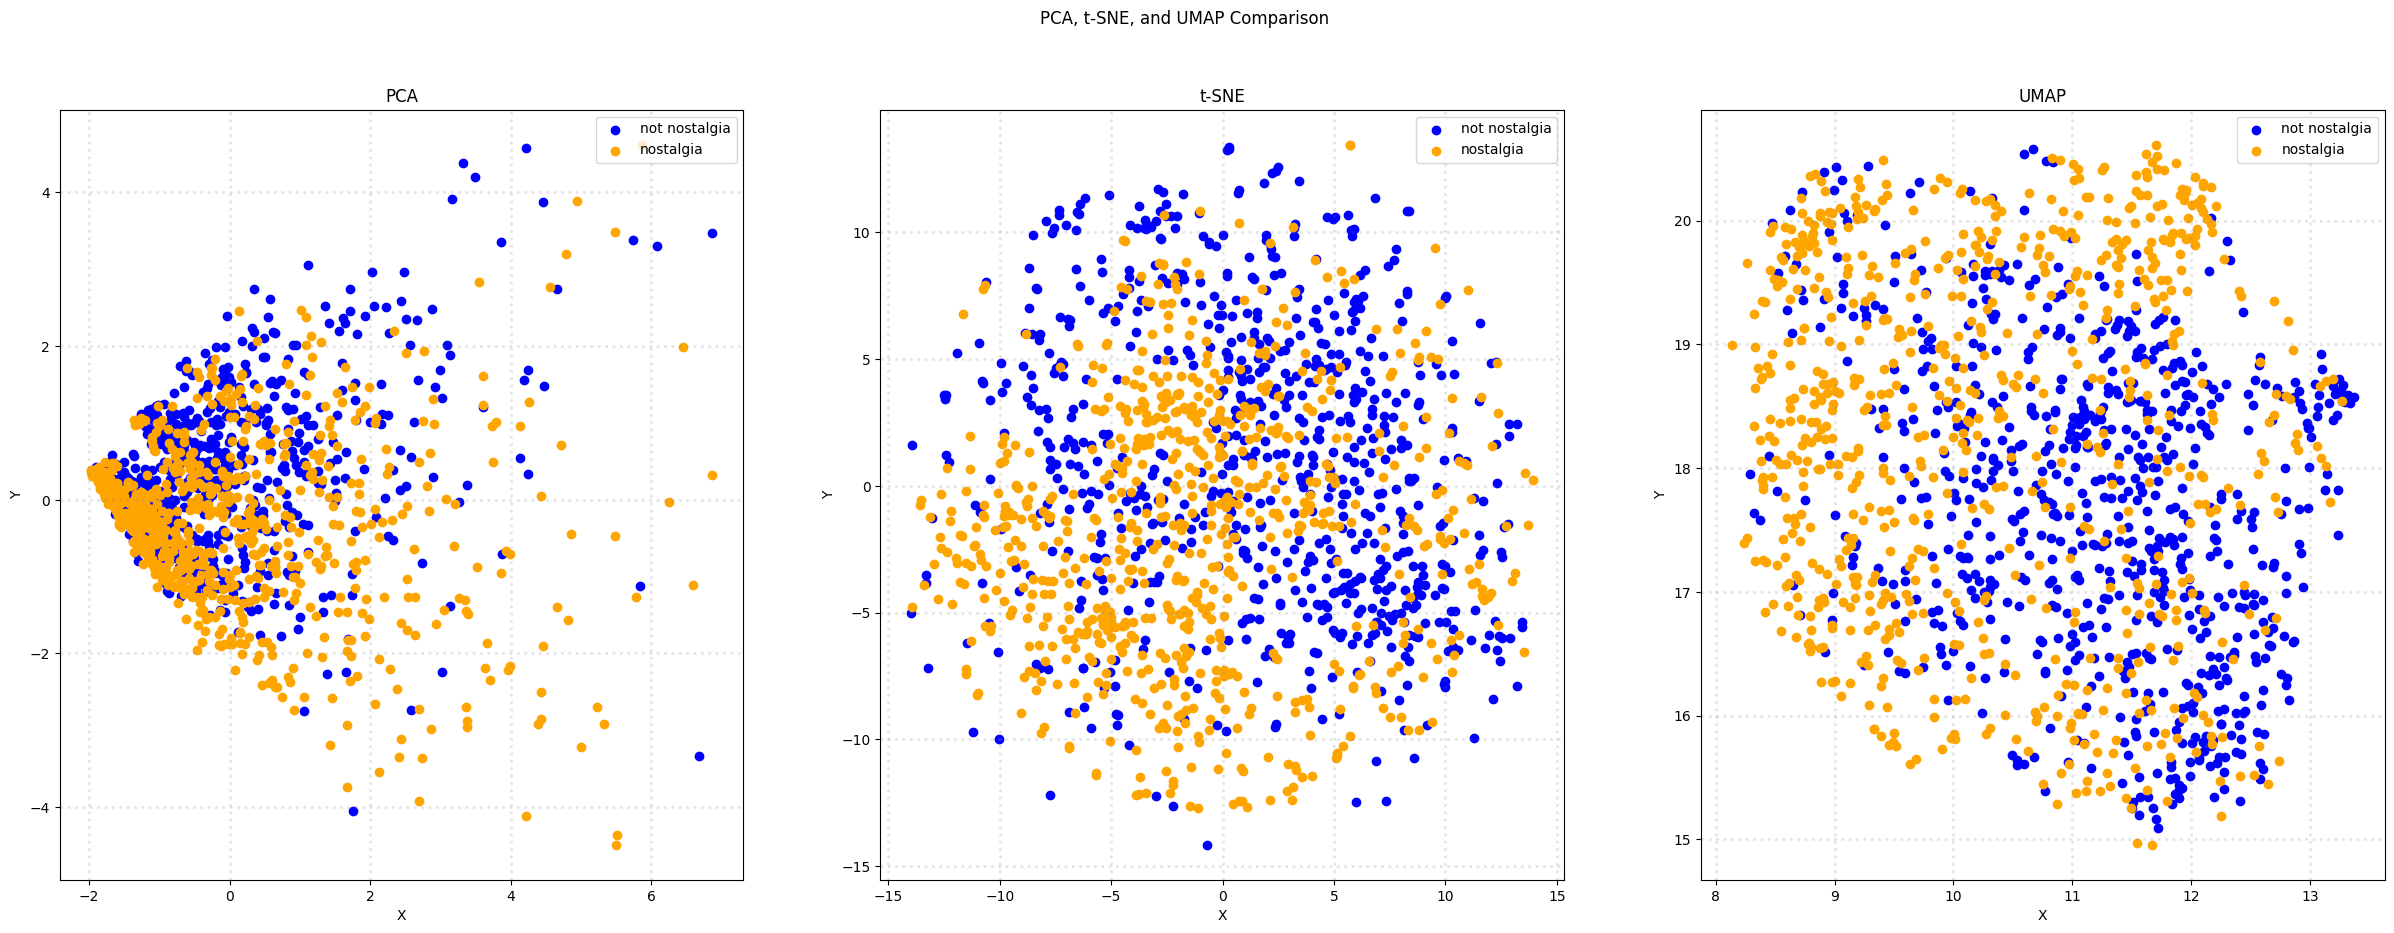

In [74]:
# PCA, TSNE, and UMAP term document visualization via scatter plot
col = ['blue', 'orange']
categories = main_df['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, df_reduced, title):
  for c, category in zip(col, categories):
    xs = df_reduced[main_df['sentiment'] == category].T[0]
    ys = df_reduced[main_df['sentiment'] == category].T[1]
    ax.scatter(xs, ys, c=c, marker='o', label=category)

  ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
  ax.set_title(title)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.legend(loc='upper right')

plot_scatter(axes[0], pca_tdm, 'PCA')
plot_scatter(axes[1], tsne_tdm, 't-SNE')
plot_scatter(axes[2], umap_tdm, 'UMAP')

plt.show()

In [ ]:
# Apply PCA, TSNE, and UMAP to augmented dataframe
pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

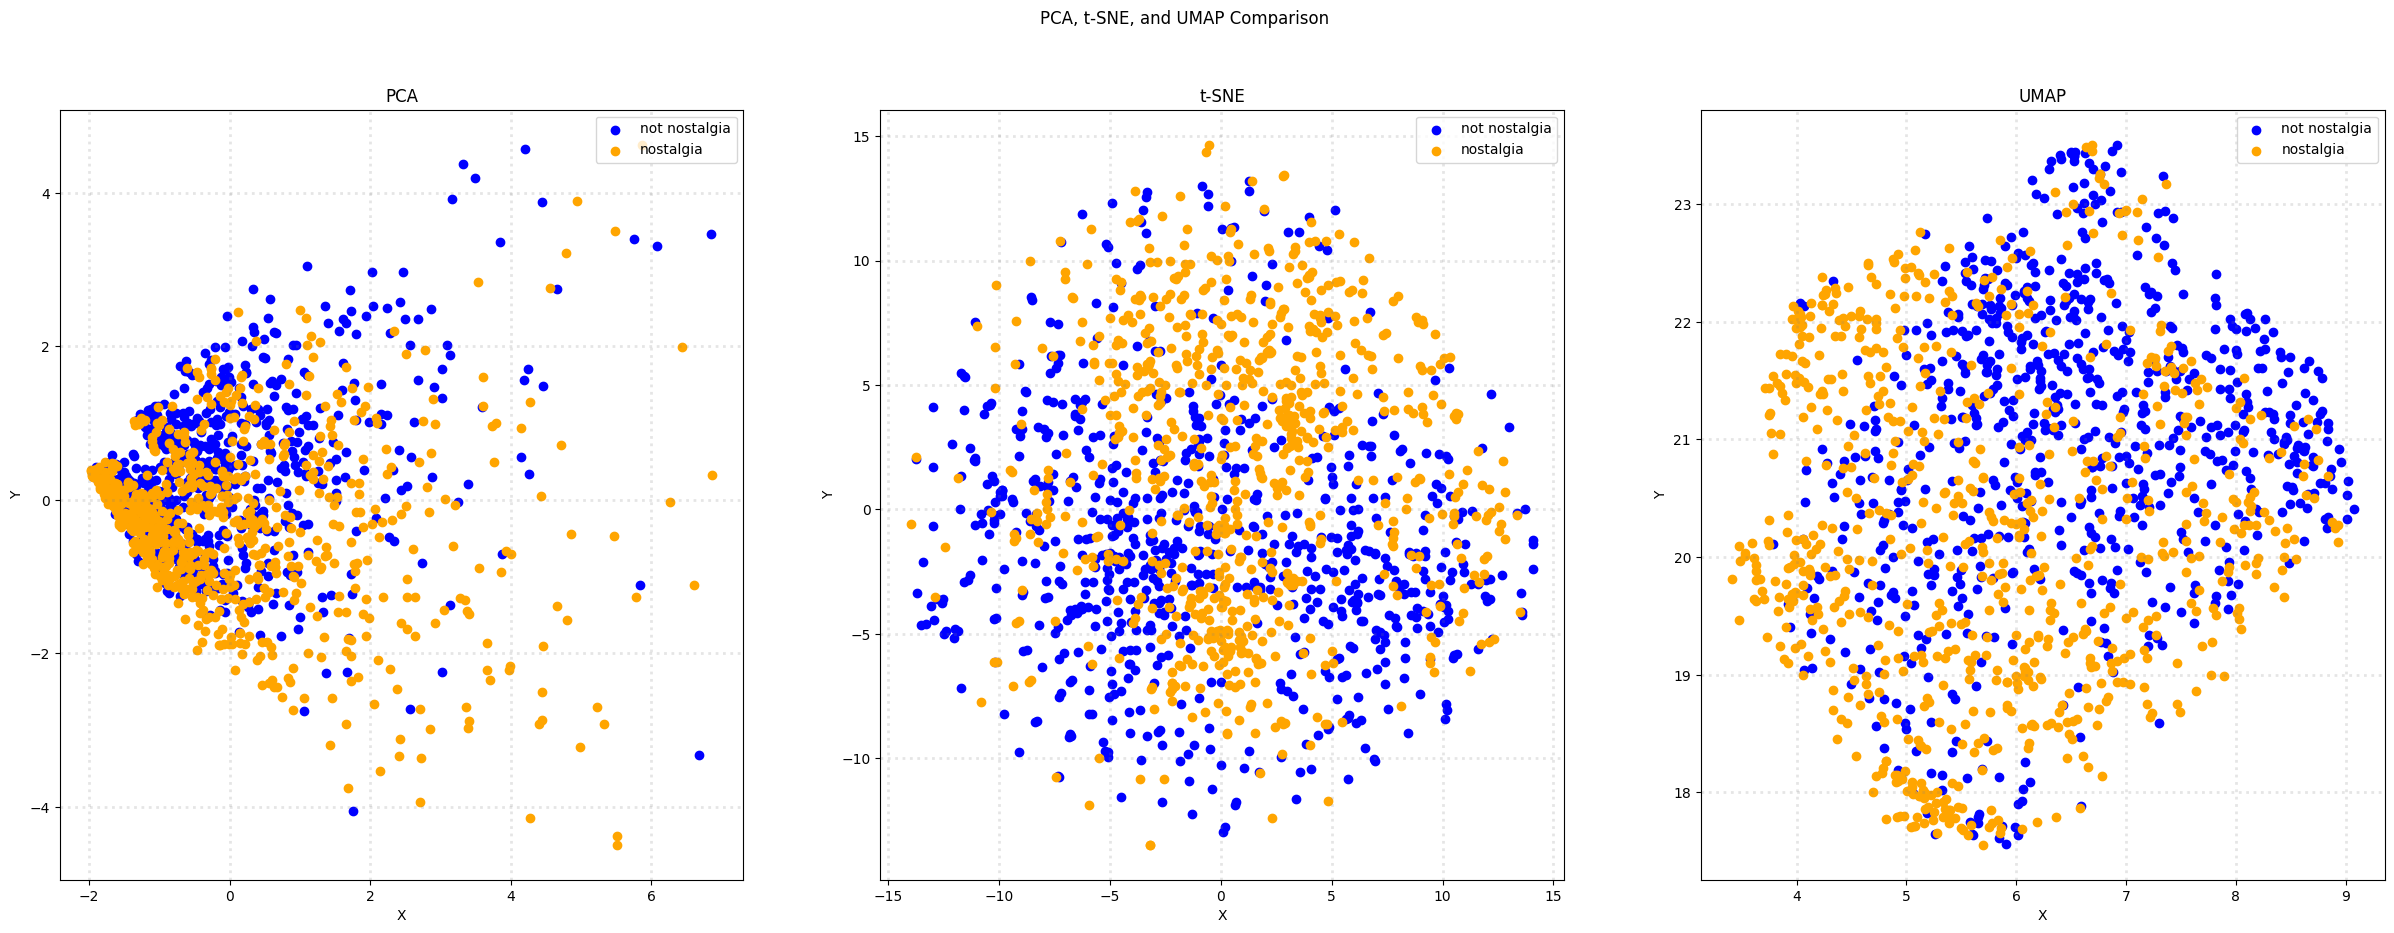

In [75]:
# PCA, TSNE, and UMAP augmented dataframe visualization via scatter plot
col = ['blue', 'orange']
categories = main_df['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, df_reduced, title):
  for c, category in zip(col, categories):
    xs = df_reduced[main_df['sentiment'] == category].T[0]
    ys = df_reduced[main_df['sentiment'] == category].T[1]
    ax.scatter(xs, ys, c=c, marker='o', label=category)

  ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
  ax.set_title(title)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.legend(loc='upper right')

plot_scatter(axes[0], pca_aug, 'PCA')
plot_scatter(axes[1], tsne_aug, 't-SNE')
plot_scatter(axes[2], umap_aug, 'UMAP')

plt.show()

### Discretization and Binarization

In [76]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [77]:
mlb = preprocessing.LabelBinarizer()

In [78]:
mlb.fit(main_df.category)

LabelBinarizer()

In [79]:
main_df['bin_category'] = mlb.transform(main_df['category']).tolist()

In [80]:
main_df

,sentiment,comment,category,unigrams,tokenized_comment,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{I, with, and, a, life., singer, Jim, those, h...",[0]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{I, and, a, kid, his, singing, ever, forgotten...",[1]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{I, and, with, Always, a, think, sweet,, no, f...",[1]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{47, some, I, and, a, later, this, years, came...",[0]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{mum, everyday, him, me, to, his, reminds, who...",[1]
...,...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",0,"[i, do, n't, know, !, .., but, the, opening, o...","{that!...he's, know!..but, video,..seeing, got...",[0]
1496,not nostalgia,it's sad this is such a beautiful song when yo...,0,"[it, 's, sad, this, is, such, a, beautiful, so...","{and, a, afraid, it's, this, him, feel.., sad,...",[0]
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",0,"[Dear, Friend, ,, I, think, age, and, time, is...","{I, and, am, think, this, music., Friend,, imp...",[0]
1498,nostalgia,I was born in 1954 and started to be aware of ...,1,"[I, was, born, in, 1954, and, started, to, be,...","{through, I, and, even, captured, years, aware...",[1]


### Data Exploration

In [81]:
# Retreive 3 random records 'comments'
document_to_transform_1 = []
random_record_1 = main_df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = main_df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = main_df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)


In [82]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [83]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [84]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity 
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_14092\1735902601.py:10: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_14092\1735902601.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_14092\1735902601.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_14092\1735902601.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

### Data Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

#### Document Term Frequency

In [85]:
# Create a mapping from numerical labels to category names
category_mapping = dict(main_df[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, main_df['category'], test_size=0.25, random_state=0)

In [86]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.864

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9416    0.7754    0.8504       187
    nostalgia     0.8100    0.9521    0.8753       188

     accuracy                         0.8640       375
    macro avg     0.8758    0.8638    0.8629       375
 weighted avg     0.8756    0.8640    0.8629       375



#### Augmented Data

In [89]:
# Create a mapping from numerical labels to category names
category_mapping = dict(main_df[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, main_df['category'], test_size=0.25, random_state=42)


In [90]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yes,tv,special,together,left,player,sure,its,favorites,find
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yes,tv,special,together,left,player,sure,its,favorites,find
1035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Train the Naive Bayes classifie
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.88

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9461    0.8178    0.8773       236
    nostalgia     0.8252    0.9486    0.8826       214

     accuracy                         0.8800       450
    macro avg     0.8856    0.8832    0.8799       450
 weighted avg     0.8886    0.8800    0.8798       450



## HW Part 3

### New Data Visualizations

#### Word Clouds

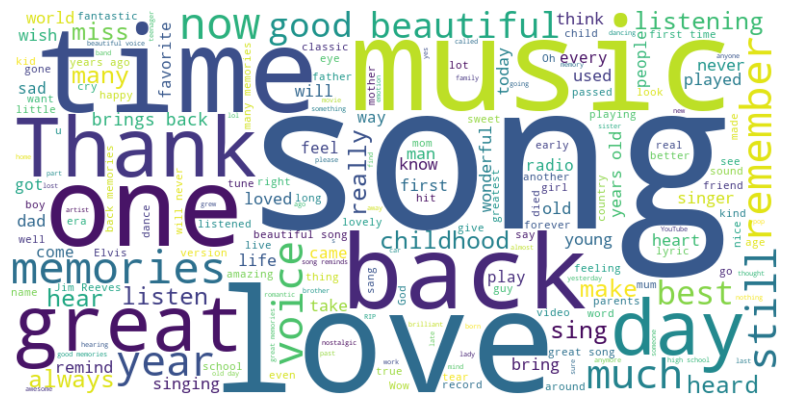

In [93]:
from wordcloud import WordCloud

text = ' '.join(main_df['comment'].astype(str))

# Generate Word cloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

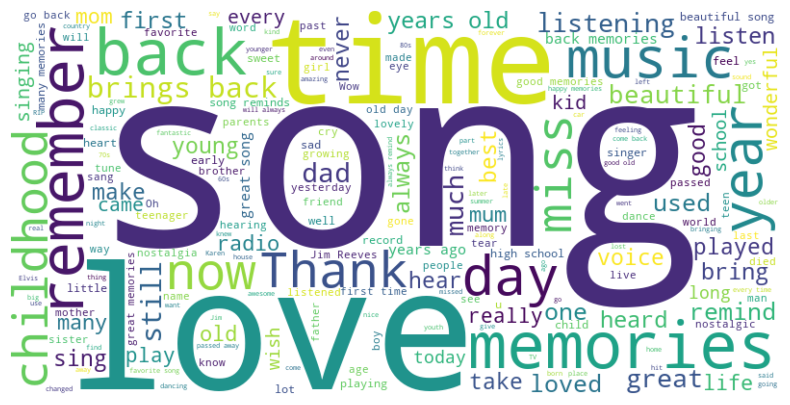

In [94]:
nostalgia_records = main_df[main_df['sentiment'] == 'nostalgia']

nostalgia_text = ' '.join(nostalgia_records['comment'].astype(str))

# Generate Word cloud (nostalgia data)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nostalgia_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

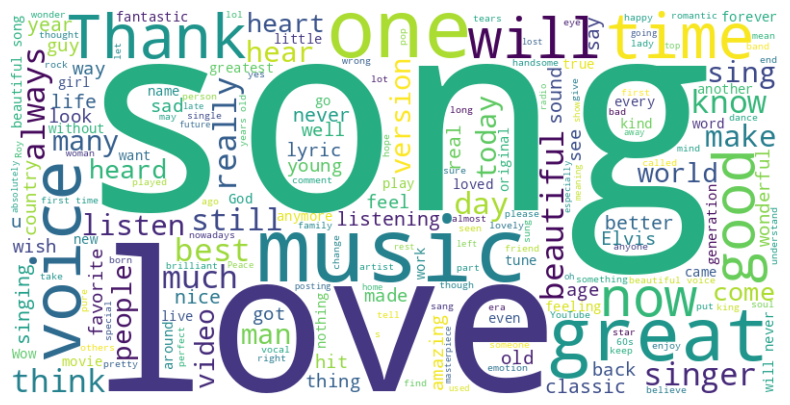

In [ ]:
not_nostalgia_records = main_df[main_df['sentiment'] == 'not nostalgia']

not_nostalgia_text = ' '.join(not_nostalgia_records['comment'].astype(str))

# Generate Word cloud (not nostalgia data)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(not_nostalgia_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Bubble Chart

In [95]:
pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)
tsne_tdm_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

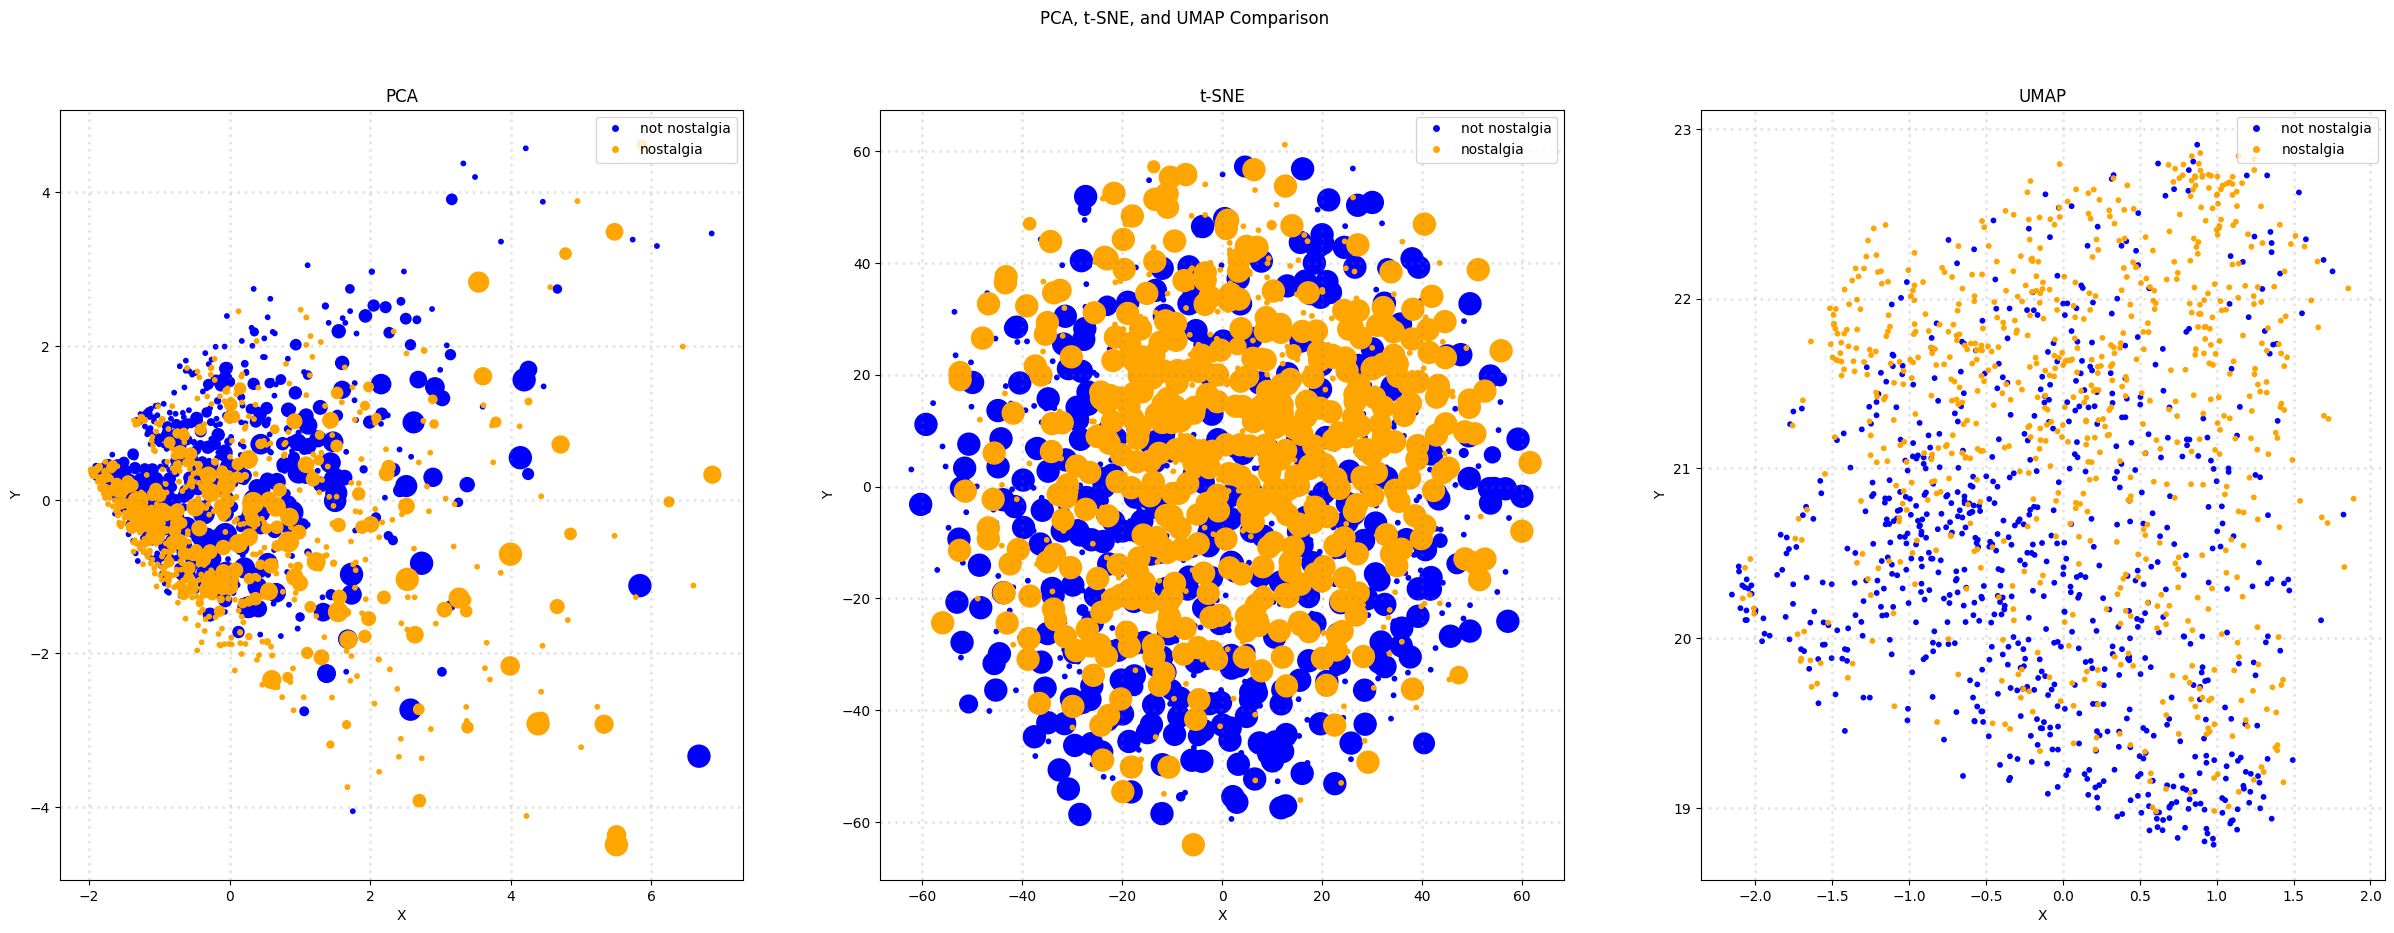

In [97]:
from matplotlib.lines import Line2D

# PCA, TSNE, and UMAP term document visualization via bubble chart
col = ['blue', 'orange']

fig = plt.figure(figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def bubble_chart(fig, df_reduced, title, position):
    ax = fig.add_subplot(position)
    handles = []

    for c, category in zip(col, categories):
        xs = df_reduced[main_df['sentiment'] == category].T[0]
        ys = df_reduced[main_df['sentiment'] == category].T[1]
        zs = df_reduced[main_df['sentiment'] == category].T[2]
        sizes = np.clip(zs * 10, a_min=1, a_max=25)

        # Utilize point size to represent the third dimension
        ax.scatter(xs, ys, s=sizes * 10, c=c, marker='o', label=category)

        handles.append(Line2D([0], [0], marker='o', color='w', label=category,
                               markerfacecolor=c))

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(handles=handles, loc='upper right')

bubble_chart(fig, pca_tdm_3d, 'PCA', 131)
bubble_chart(fig, tsne_tdm_3d, 't-SNE', 132)
bubble_chart(fig, umap_tdm_3d, 'UMAP', 133)

### TF-IDF Features

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer()

#Generate TF-IDF term document
tf_counts = tf_vect.fit_transform(main_df.comment)

print(tf_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [99]:
# Convert new term document to array
plot_x = ["term_"+str(i) for i in tf_vect.get_feature_names_out()]
plot_y = ["doc_"+ str(i) for i in list(main_df.index)]
plot_z = tf_counts[:,:].toarray()

plot_z.shape

(1498, 3730)

In [100]:
# Remove short words
mask = tf_vect.get_feature_names_out()

mask = np.array([len(word) > word_limit for word in mask])

plot_z = plot_z[:, mask]
plot_x = [plot_x[i] for i in range(len(plot_x)) if mask[i]]

plot_z.shape

(1498, 2738)

In [101]:
# Sorting and extracting top columns
column_sum = np.sum(plot_z, axis=0)
col_top = np.argpartition(column_sum, -1 * top_range)[-1 * top_range:]

col_top_indices = col_top[np.argsort(-column_sum[col_top])]

columns_to_keep = np.zeros(column_sum.shape, dtype=bool)
columns_to_keep[col_top_indices] = True

plot_z = plot_z[:, columns_to_keep]
plot_x = [plot_x[i] for i in range(len(plot_x)) if columns_to_keep[i]]

plot_z.shape

(1498, 30)

In [102]:
# Sorting and extracting top rows
row_sum = np.sum(plot_z, axis=1)
row_top = np.argpartition(row_sum, -1 * top_range)[-1 * top_range:]

row_top_indices = row_top[np.argsort(-row_sum[row_top])]

rows_to_keep = np.zeros(row_sum.shape, dtype=bool)
rows_to_keep[row_top_indices] = True

plot_z = plot_z[rows_to_keep]
plot_y = [plot_y[i] for i in range(len(plot_y)) if rows_to_keep[i]]

plot_z.shape

(30, 30)

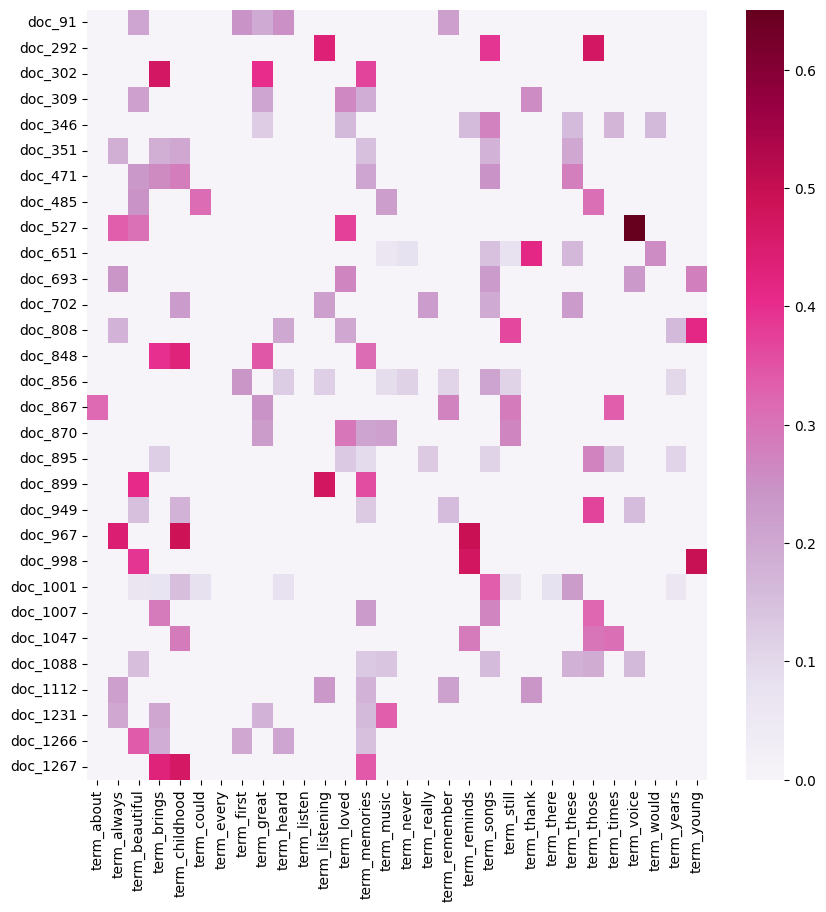

In [103]:
# New filtered dataset visualization via heatmap
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))

ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                vmin=0, vmax=np.max(plot_z),
                 annot=False)

#### Naive Bayes Classifier

In [120]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

# Naive Bayes setup
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

In [121]:
from sklearn.model_selection import train_test_split

# TF-IDF training-testing split
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(tf_counts.toarray(), main_df['sentiment'], test_size=0.25, random_state=42)

##### Multinomial

In [122]:
# Multinomial Naive Bayes Fitting
mnb.fit(tf_X_train, tf_y_train)
mnb.score(tf_X_test, tf_y_test)

0.864

##### Bernoulli

In [123]:
# Bernoulli Naive Bayes Fitting
bnb.fit(tf_X_train, tf_y_train)
bnb.score(tf_X_test, tf_y_test)

0.8906666666666667

##### Gaussian

In [124]:
# Gaussian Naive Bayes Fitting
gnb.fit(tf_X_train, tf_y_train)
gnb.score(tf_X_test, tf_y_test)

0.6506666666666666

## HW Part 4

Stop words are also removed from the list of terms via CountVectorizer however stop words are not the only problem word that takes away the spotlight from keywords. Other words include conjunctions (e.g. however, but, hence), pronouns (e.g. they, he, she), synonyms (e.g. guy and man), and words that stem from other words (e.g. sing and singing). This causes some words to not be highlighted or become less prominent then they should be.

